## Diffrent time series model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the strengths and weaknesses for each model
data = {
    'Criteria': ['Simplicity and Speed', 'Handling Missing Data/Outliers', 'Model Flexibility and Complexity Handling', 
                 'Seasonality Handling', 'Computational Requirements'],
    'Exponential Smoothing': [5, 2, 2, 2, 5],
    'Prophet': [3, 5, 4, 4, 3],
    'ARIMA': [4, 3, 3, 3, 4],
    'SARIMA': [3, 3, 3, 5, 3],
    'LSTM': [2, 4, 5, 2, 2]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Number of variables
categories = list(df['Criteria'])
N = len(categories)

# Create radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Define colors and markers for each model
colors = sns.color_palette("husl", len(df.columns[1:]))
markers = ['o', 's', 'D', 'X', '^']

# Add each model to the plot
for i, model in enumerate(df.columns[1:]):
    values = df[model].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i], marker=markers[i])
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=14, fontweight='bold')

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=12)
plt.ylim(0, 5)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.title('Comparative Strengths and Weaknesses of Time Series Models', size=18, color='black', fontweight='bold', y=1.1)
plt.show()


## Import the Data 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [3]:
actual_df = pd.read_csv('AAPL.csv')
actual_df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  03-01-2012  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  04-01-2012  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  05-01-2012  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  06-01-2012  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  09-01-2012  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [4]:
df = pd.read_csv('AAPL.csv')
df.tail()

Date        Open        High         Low       Close   Adj Close  \
2006  23-12-2019  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  24-12-2019  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  26-12-2019  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  27-12-2019  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  30-12-2019  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600

In [5]:
df.shape

(2011, 7)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # specify the correct format
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1 2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2 2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3 2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4 2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.freq='B'

# EDA

#### Volume = it indicates how actively stock traddng , it shows public intrest 
#### Adj Close = Close price adjusted

In [9]:
round(df.describe().T,1)

count        mean         std         min         25%         50%  \
Open       2011.0       126.7        50.5        55.4        85.9       113.1   
High       2011.0       127.8        50.9        57.1        86.7       114.2   
Low        2011.0       125.6        50.1        55.0        85.1       111.9   
Close      2011.0       126.7        50.6        55.8        86.2       113.1   
Adj Close  2011.0       119.5        52.4        48.9        75.1       105.2   
Volume     2011.0  59496704.7  46838558.5  11362000.0  27585650.0  43469000.0   

                  75%          max  
Open            165.2        291.1  
High            167.4        294.0  
Low             163.4        288.1  
Close           165.2        291.5  
Adj Close       160.0        289.5  
Volume     74710300.0  376530000.0

**No missing values are present**

### Inferences 

**The mean values for Open, High, Low, and Close prices are relatively close to each other, indicating consistency across these price metrics.**

**Volume data has a wide range**

### Line Plot

In [10]:
sns.set(style="whitegrid")
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Stock Data Overview', fontsize=16)

# Plot Open prices
sns.lineplot(ax=axes[0, 0], x='Date', y='Open', data=df)
axes[0, 0].set_title('Open Prices')

# Plot High prices
sns.lineplot(ax=axes[0, 1], x='Date', y='High', data=df)
axes[0, 1].set_title('High Prices')

# Plot Low prices
sns.lineplot(ax=axes[1, 0], x='Date', y='Low', data=df)
axes[1, 0].set_title('Low Prices')

# Plot Close prices
sns.lineplot(ax=axes[1, 1], x='Date', y='Close', data=df)
axes[1, 1].set_title('Close Prices')

# Plot Volume
sns.lineplot(ax=axes[2, 0], x='Date', y='Volume', data=df)
axes[2, 0].set_title('Volume')

# Plot Adjusted Close prices
sns.lineplot(ax=axes[2, 1], x='Date', y='Adj Close', data=df)
axes[2, 1].set_title('Adjusted Close Prices')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Distribution Plot

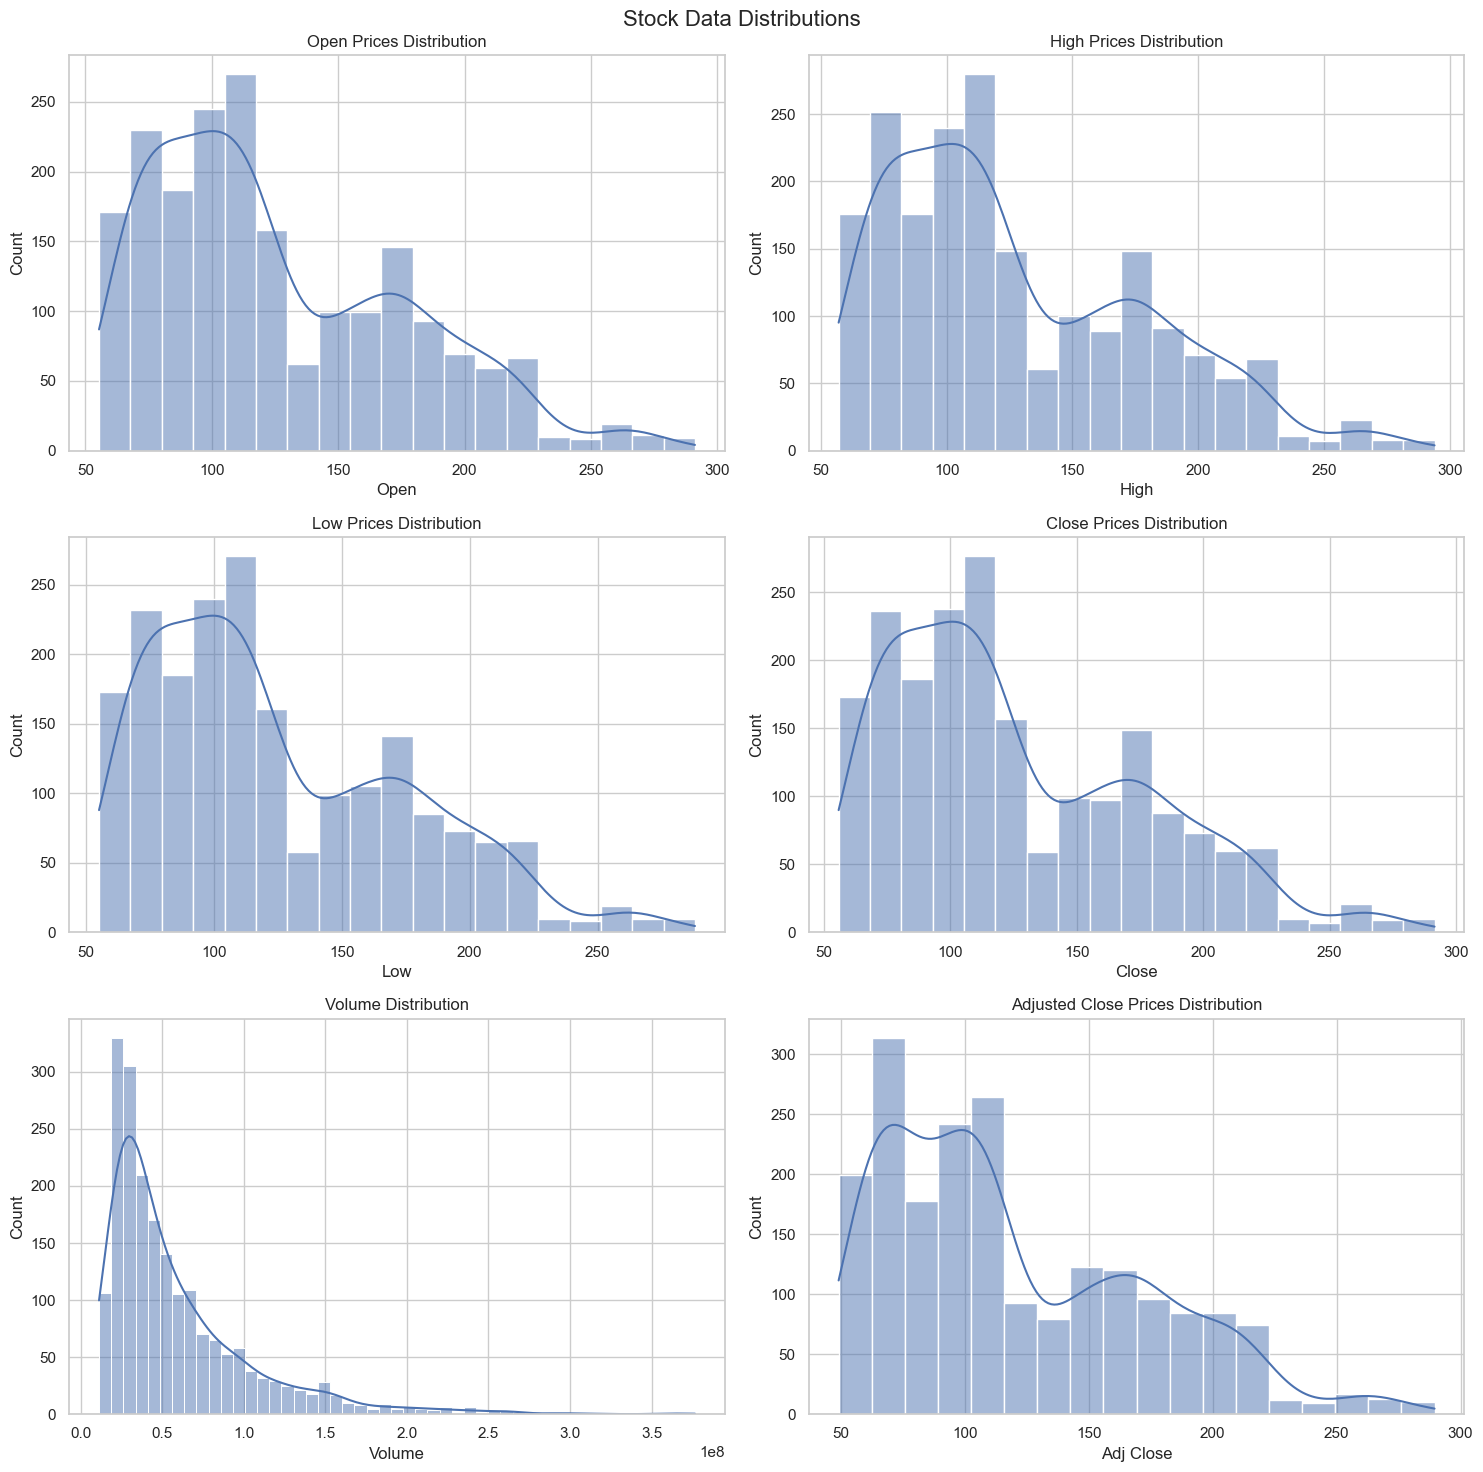

In [11]:
# Set the style

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Stock Data Distributions', fontsize=16)

# Plot Open prices distribution
sns.histplot(df['Open'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Open Prices Distribution')

# Plot High prices distribution
sns.histplot(df['High'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('High Prices Distribution')

# Plot Low prices distribution
sns.histplot(df['Low'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Low Prices Distribution')

# Plot Close prices distribution
sns.histplot(df['Close'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Close Prices Distribution')

# Plot Volume distribution
sns.histplot(df['Volume'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Volume Distribution')

# Plot Adjusted Close prices distribution
sns.histplot(df['Adj Close'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Adjusted Close Prices Distribution')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Inference from Lineplot and Dist plot

#### Line Plot: overall strong consistence in upward trend.

#### Line Plot: overall strong consistence in upward trend.

#### Distribution is skewed towards the right, it indicates that positive price changes are more frequent.

#### Overall Decreasing volume along with upward price trend due to some reasons.

### Daily percentage change in closing prices.

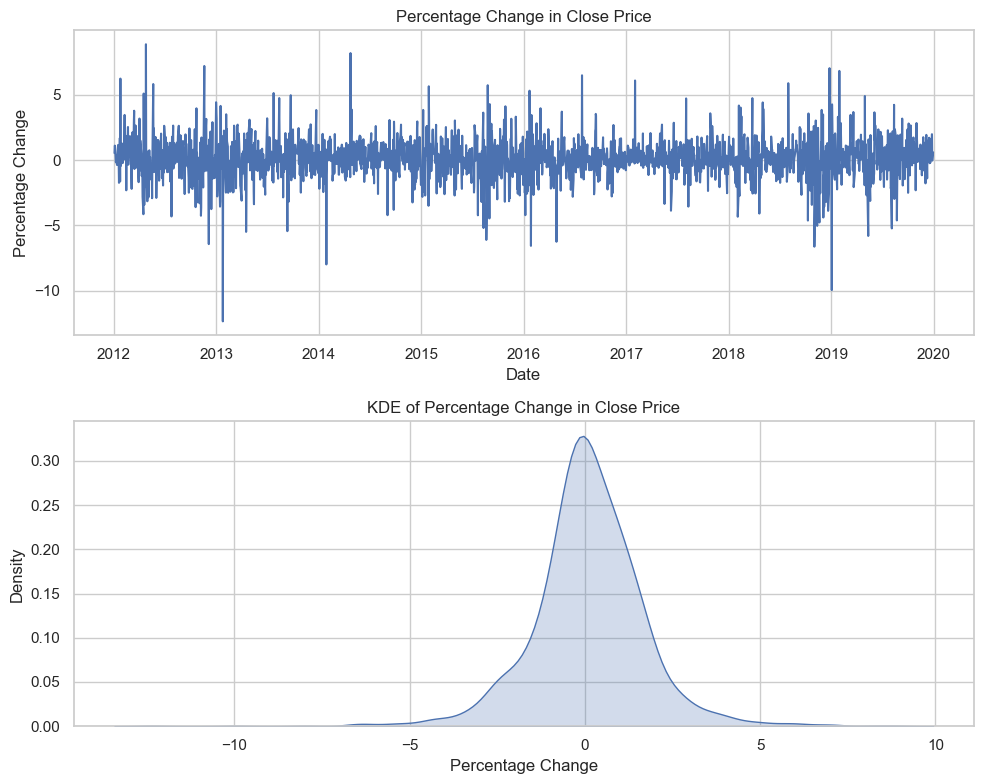

In [12]:
# Assuming df is your DataFrame
# Calculate percentage change
df['PctChangeClose'] = df['Close'].pct_change(periods=1) * 100

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Line plot for PctChangeClose
ax[0].plot(df['PctChangeClose'])
ax[0].set_title('Percentage Change in Close Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Percentage Change')

# KDE plot for PctChangeClose
sns.kdeplot(df['PctChangeClose'], fill=True, ax=ax[1])
ax[1].set_title('KDE of Percentage Change in Close Price')
ax[1].set_xlabel('Percentage Change')

# Show the plot
plt.tight_layout()
plt.show()


#### It indicates daily fluctuations in stock.
#### Highest Positive close price change 8.87 % which indicates a recovery or positive sentiment in the market.
#### Highest Negative close price change -12.35579 % which indicates negative or bad market conditions or any other reason.
#### Avg Daily Price Change(Mean) 0.092 %
#### On and Average Daily Price Change(STD)(68 % Confidence) = +- 1.612 % , stock is consistence, it gives me high confidenct to invest
#### On and avg daily percentage fluctuation is less. 

### Time Series Components 

In [13]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

print("Moving Averages (10-day and 50-day):")
print(df[['MA10', 'MA50']].tail())


Moving Averages (10-day and 50-day):
                  MA10      MA50
Date                            
2019-12-23  276.932996  259.6744
2019-12-24  278.511993  260.6424
2019-12-26  280.425995  261.7342
2019-12-27  282.259995  262.8428
2019-12-30  283.896994  263.9676


### 10-day moving average goes above the 50-day moving average, 
### it means recent prices are higher than usual,which is considered positive stockexchange rate and it indicate a continuation of the upward trend in prices.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_data=seasonal_decompose(df['Close'],model='multiplicative', period=365)

### Plot of Time Series Components present in Close price of stock exchange 

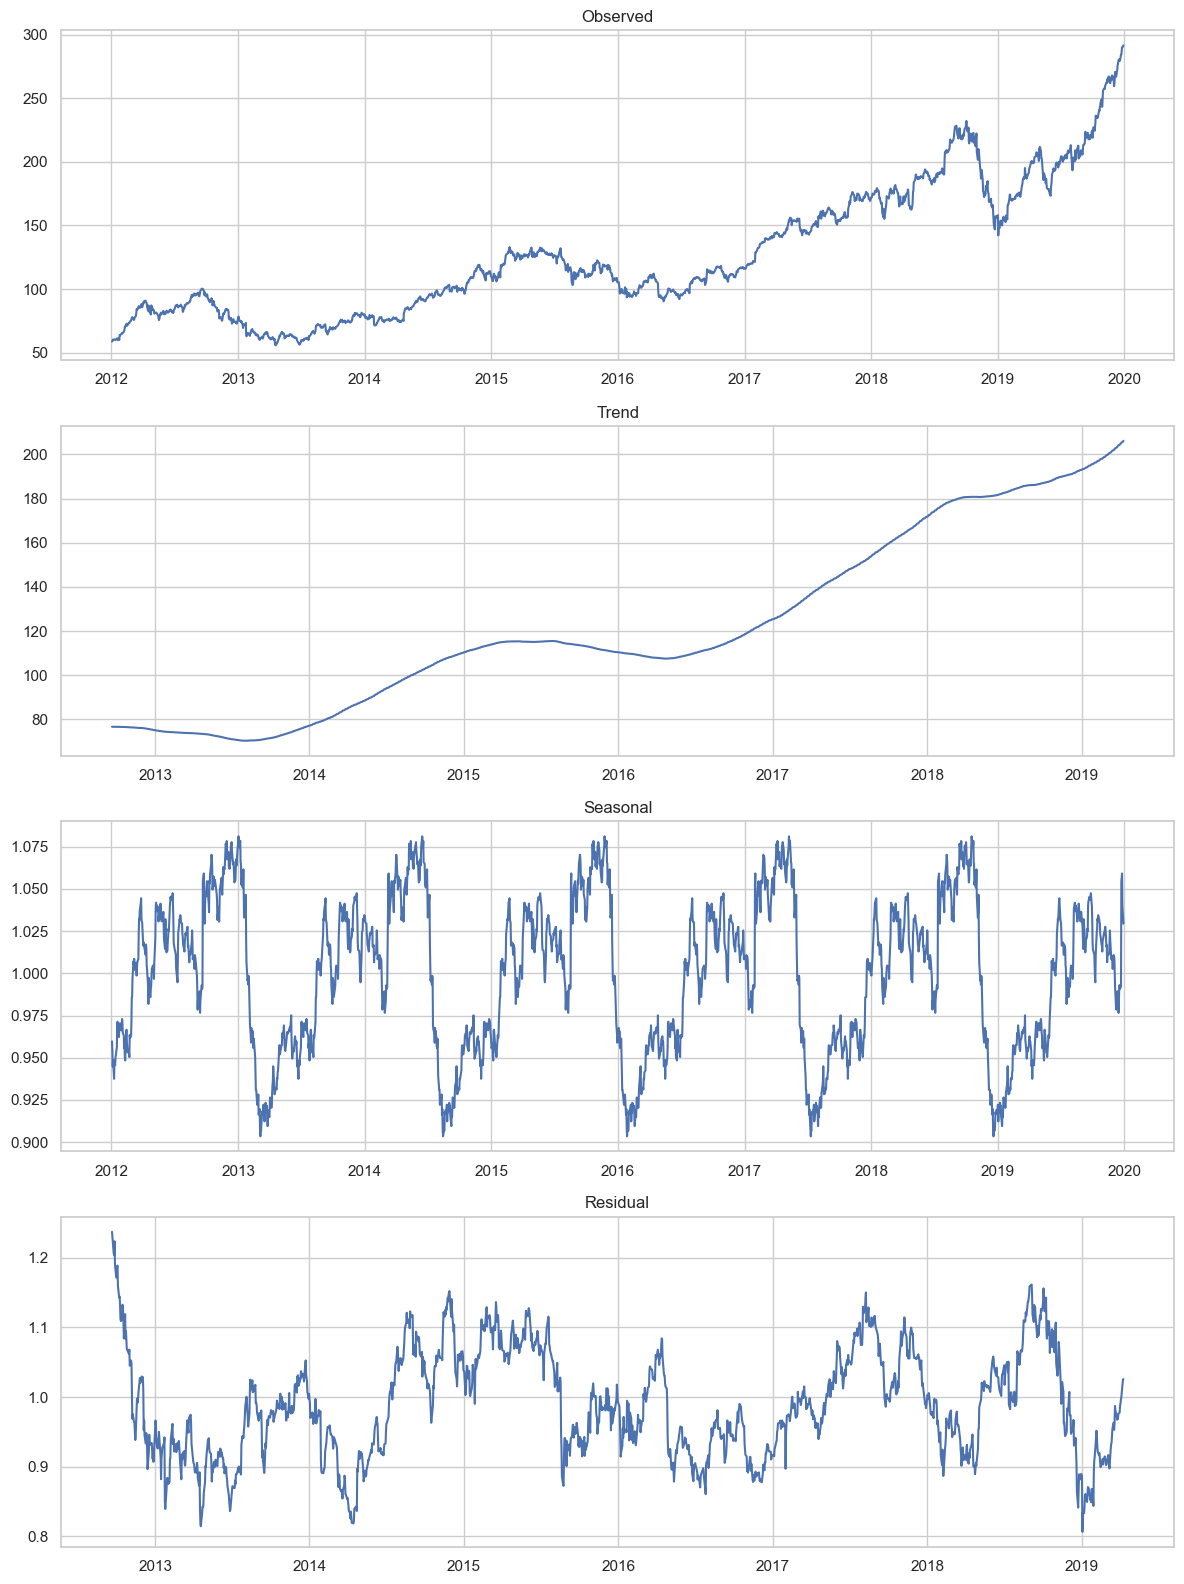

In [15]:
result = seasonal_decompose(df['Close'], model='multiplicative',period=365)

# Set the figure size
plt.figure(figsize=(12, 16))

# Plot observed, trend, seasonal, and residual components
plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**The price of stocks from 2012 to 2019 shows an overall increasing trend, indicating potential long-term growth opportunities**

**Trend -- Growth Potential: The upward trend suggests the stock has been consistently increasing in value, potentially offering growth opportunities**

**Seasonality -- Seasonal Influence: apple stocks shows predictable patterns at certain times, likely influenced by seasonal factors.**


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

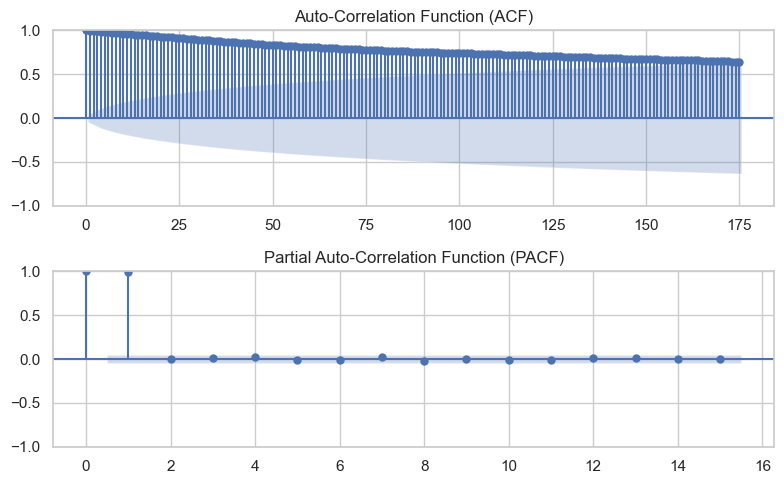

In [17]:
# Resample data to business day frequency, forward fill any missing values
df = df.resample('B').ffill()

# Plot ACF and PACF8
plt.figure(figsize=(8, 5))

# ACF
plt.subplot(211)
plot_acf(df['Close'], lags=175, ax=plt.gca())
plt.title('Auto-Correlation Function (ACF)')

# PACF
plt.subplot(212)
plot_pacf(df['Close'], lags=15, ax=plt.gca())
plt.title('Partial Auto-Correlation Function (PACF)')

plt.tight_layout()
plt.show()

### ACF Inference

**Long-Term Correlationat: The ACF plot shows significant correlations extending up to lag 167. This indicates that the stock prices exhibit long-term dependencies, meaning that past values (up to approximately 167 days) have a significant influence on current values.**

**Seasonality and Persistence: The long support in the ACF suggests potential seasonal effects or persistent long-term trends in the stock prices. It could mean that the stock exhibits seasonal cycles, such as quarterly or annual patterns, or that there is a strong momentum effect where past trends tend to persist over a longer period.**

### PACF Inference

**Lag-1 Dependency: The PACF plot shows that only lag-1 has a significant correlation, indicating that the next value of the stock exchange depends primarily on its immediate previous value. This suggests a strong short-term autoregressive component (AR(1) process), where today's closing price is a good predictor of tomorrow's closing price.**


## Moving Average

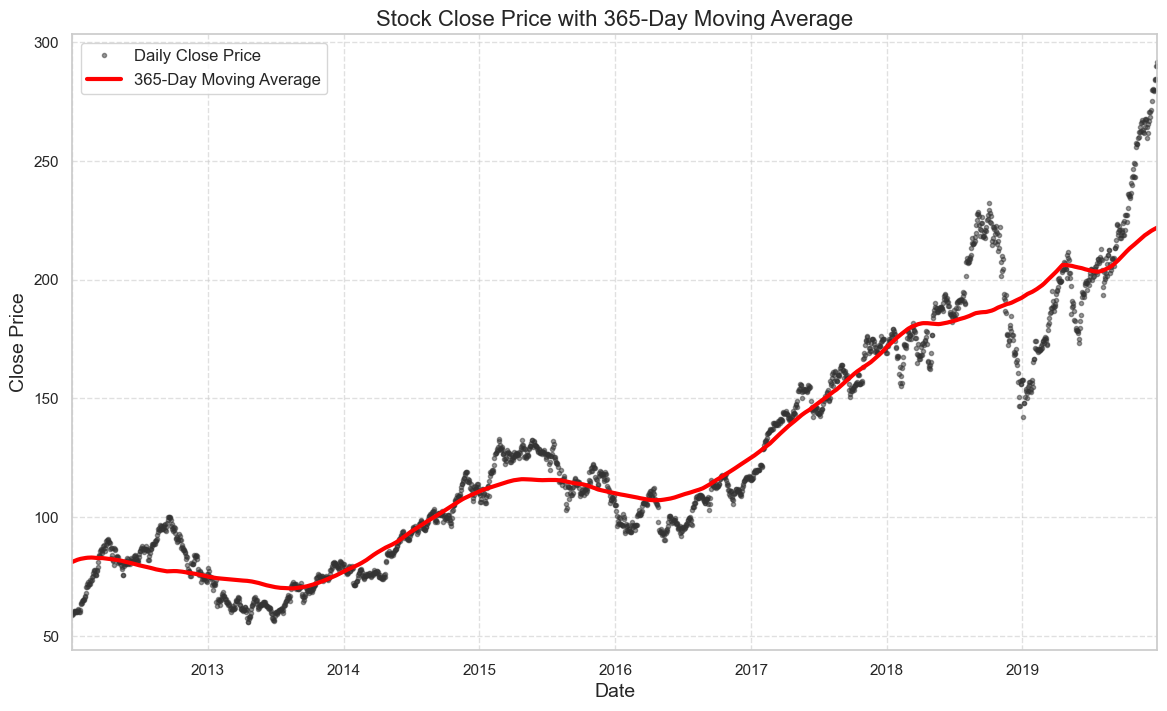

In [18]:
# Compute the 365-day moving average
moving_average = df['Close'].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=170,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

# Plotting
plt.figure(figsize=(14, 8))
ax = df['Close'].plot(style=".", color="0.2", label='Daily Close Price', alpha=0.5)
moving_average.plot(ax=ax, linewidth=3, color='red', label='365-Day Moving Average')

# Customizing the plot
plt.title("Stock Close Price with 365-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

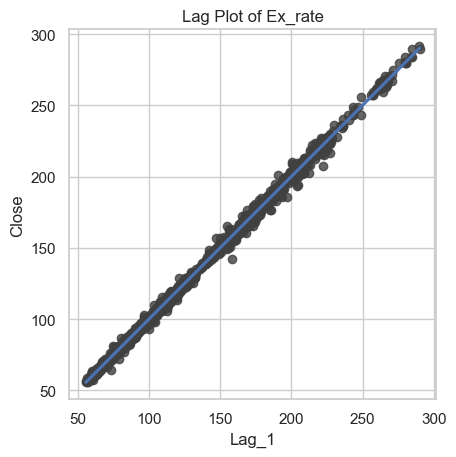

In [19]:
fig, ax = plt.subplots()
df['Lag_1'] = df['Close'].shift(1)
df_ = df.reindex(columns=['Ex_rate', 'Lag_1'])
df_.head()
ax = sns.regplot(x='Lag_1', y='Close', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Ex_rate');

**In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than 1% over a sustained period of time, it is called a volatile market. An asset's volatility is a key factor when pricing options contracts.**


In [20]:
df["month"] = df.index.strftime("%b") # month extraction
df["year"] = df.index.strftime("%Y") # year extraction

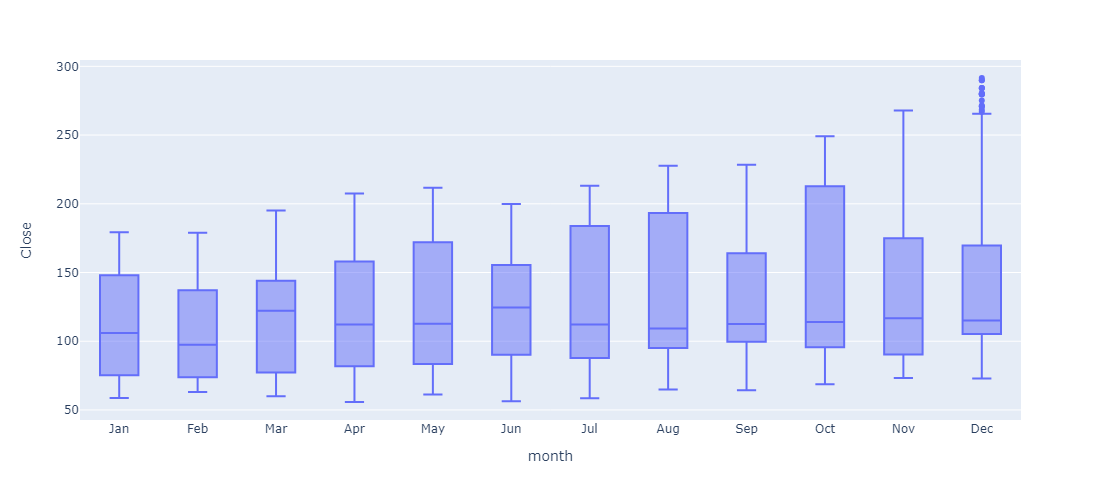

In [21]:
import plotly.express as px
fig = px.box(df, x='month', y='Close')
# Increase the size of the boxplot
fig.update_layout(width=1000, height=500)
fig.show()

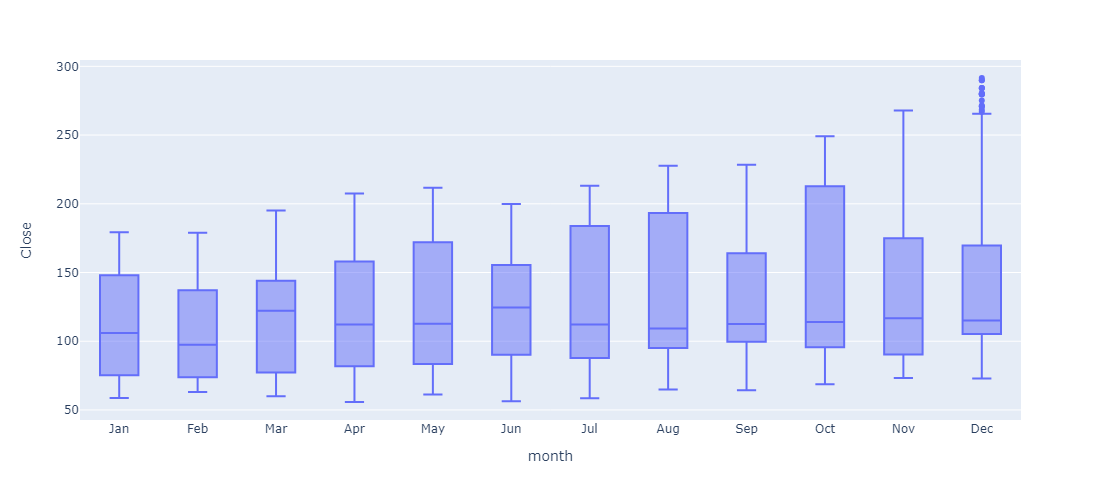

In [22]:
fig.update_layout(width=1000, height=500)
px.box(df,x='year', y='Close' )
fig.show()

## Data Preprocessing 

In [23]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    plt.figure(figsize=(12, 6))
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)
def adf_test(data):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

Results of Dickey-Fuller Test :

Test Statistic                    0.978428
p-value                           0.994033
#Lags Used                       26.000000
Number of Observations Used    2058.000000
Critical Value (1%)              -3.433531
Critical Value (5%)              -2.862945
Critical Value (10%)             -2.567518
dtype: float64
None
---------------------------------------------
Failed to reject the null hypothesis
Data is Not stationary
None
---------------------------------------------


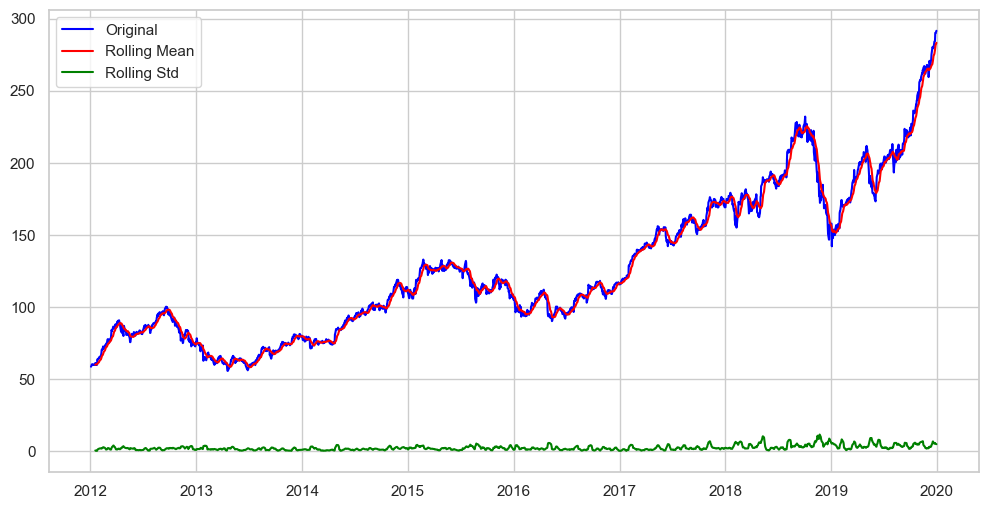

In [24]:
print(test_stationarity(df['Close']))
print("---------------------------------------------")
print(adf_test(df["Close"]))
print("---------------------------------------------")

### As we can see moving std deviation is stable so it indicates the stability of the market.

**addifuler test**
#####  H0: Data is not Stationary
#####  H1: Data is Stationary
#####  Result of hypo testing --> Test Statistics > Critical Value   
####  Fail to Reject null hypotesis, so my data is not stationary.

**Future prediction is difficult when our past and present data have fluctuations, so need to convert in costant form.**

In [25]:
from statsmodels.tsa.statespace.tools import diff
df_1 = diff(df["Close"],k_diff=1)
print(df_1)
### Check for stationarity
print("---------------------------------------------")
print(adf_test(df_1))

Date
2012-01-04    0.315716
2012-01-05    0.655712
2012-01-06    0.624286
2012-01-09   -0.095714
2012-01-10    0.215713
                ...   
2019-12-24    0.269989
2019-12-25    0.000000
2019-12-26    5.640015
2019-12-27   -0.110016
2019-12-30    1.720001
Freq: B, Name: Close, Length: 2084, dtype: float64
---------------------------------------------
Reject the null hypothesis
Data is stationary
None


Results of Dickey-Fuller Test :

Test Statistic                -7.644871e+00
p-value                        1.854085e-11
#Lags Used                     2.500000e+01
Number of Observations Used    2.058000e+03
Critical Value (1%)           -3.433531e+00
Critical Value (5%)           -2.862945e+00
Critical Value (10%)          -2.567518e+00
dtype: float64


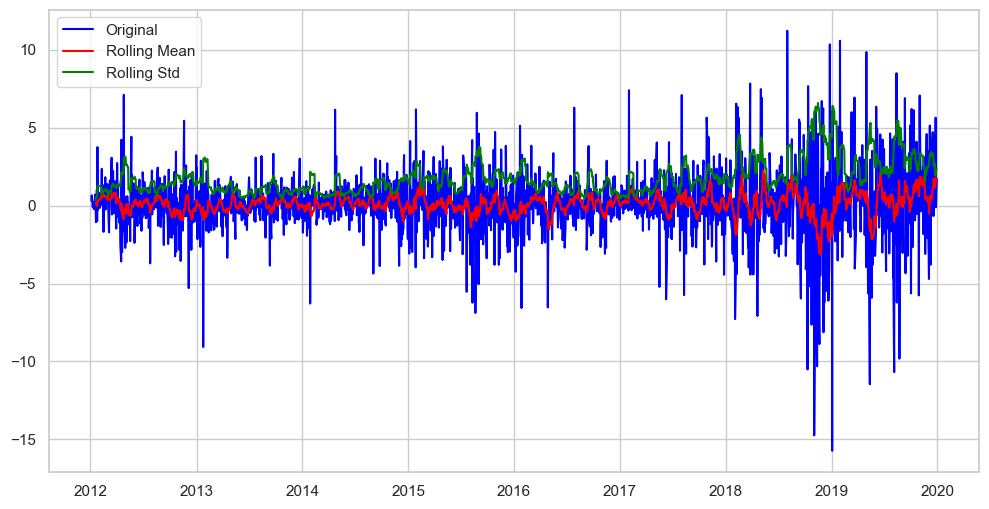

In [26]:
test_stationarity(df_1)

## General Exponential Model

In [27]:
new_df = df["Close"]
new_df

Date
2012-01-03     58.747143
2012-01-04     59.062859
2012-01-05     59.718571
2012-01-06     60.342857
2012-01-09     60.247143
                 ...    
2019-12-24    284.269989
2019-12-25    284.269989
2019-12-26    289.910004
2019-12-27    289.799988
2019-12-30    291.519989
Freq: B, Name: Close, Length: 2085, dtype: float64

In [28]:
train_len = int(len(df)*0.75)
test_len = int(len(df)*0.25)

train_len, test_len

(1563, 521)

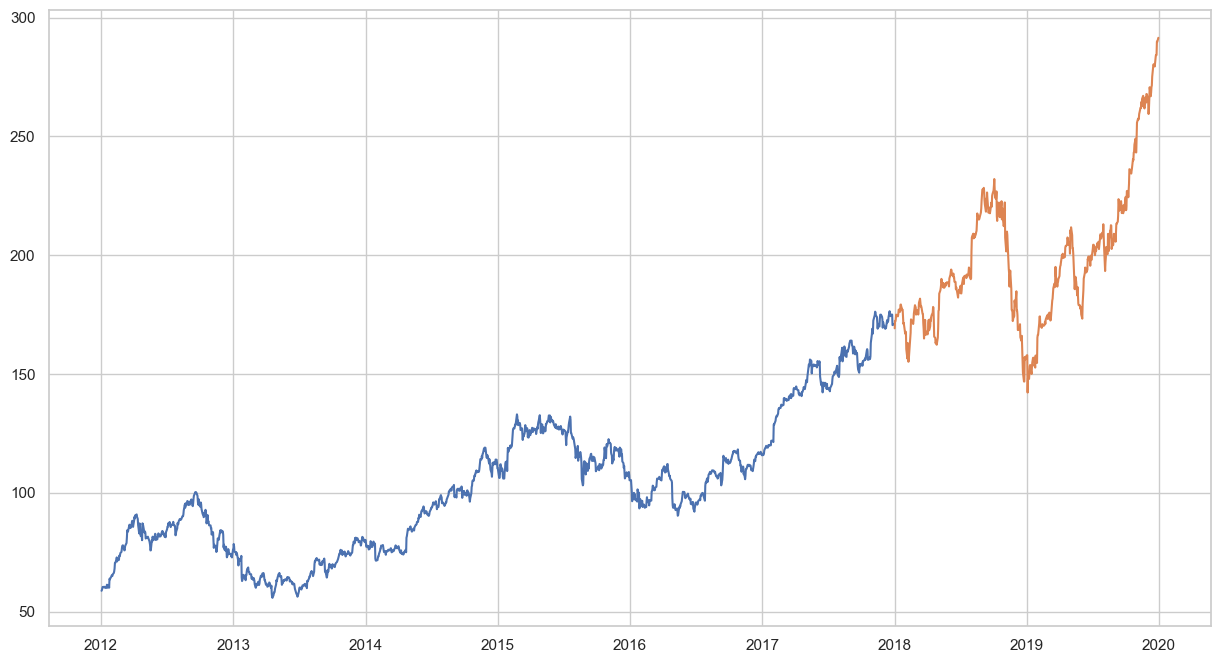

In [29]:
plt.figure(figsize=(15,8))
train_data = new_df[:1563]
test_data = new_df[1564:]
plt.plot(train_data)
plt.plot(test_data)
plt.show()


# Simple Exponential SMoothing

In [30]:
ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.9)
forecas = ses_model.forecast(test_len)

C:\Users\HP\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning



In [31]:
predicted_values = test_data.index
len(test_data)
len(predicted_values)
predicted_values = pd.DataFrame(forecas.values)
predicted_values[0].index= test_data.index
predicted_values[0]

Date
2018-01-01    171.036142
2018-01-02    171.036142
2018-01-03    171.036142
2018-01-04    171.036142
2018-01-05    171.036142
                 ...    
2019-12-24    171.036142
2019-12-25    171.036142
2019-12-26    171.036142
2019-12-27    171.036142
2019-12-30    171.036142
Freq: B, Name: 0, Length: 521, dtype: float64

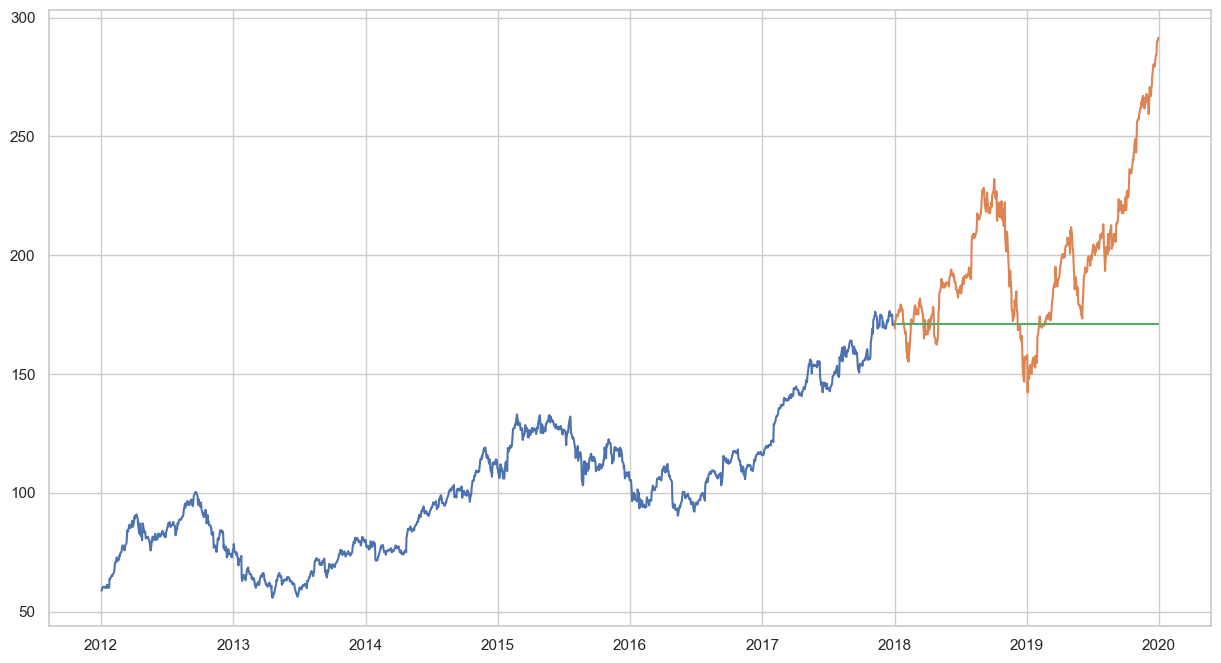

In [32]:
plt.figure(figsize=(15,8))
plt.plot(train_data )
plt.plot(test_data)
plt.plot(predicted_values[0] )
plt.show()

In [33]:
# Metrix

In [34]:
model_residuals = pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [35]:
mse = mean_squared_error(test_data,predicted_values[0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,predicted_values[0])
mape = mean_absolute_percentage_error(test_data,predicted_values[0])
model_residuals['SES'] = [mse,rmse,mae,mape]
model_residuals

SES
MSE   1634.603017
RMSE    40.430224
MAE     30.072989
MAPE     0.137438

# Double Exponential Smoothing

In [36]:
des_AddTrend = ExponentialSmoothing(train_data, trend='add').fit()
res = des_AddTrend.forecast(test_len)

In [37]:
predicted_values = test_data.index
predicted_values = pd.DataFrame(res.values)
predicted_values[0].index= test_data.index
predicted_values[0]

Date
2018-01-01    171.151917
2018-01-02    171.223833
2018-01-03    171.295748
2018-01-04    171.367664
2018-01-05    171.439579
                 ...    
2019-12-24    208.260278
2019-12-25    208.332193
2019-12-26    208.404109
2019-12-27    208.476024
2019-12-30    208.547939
Freq: B, Name: 0, Length: 521, dtype: float64

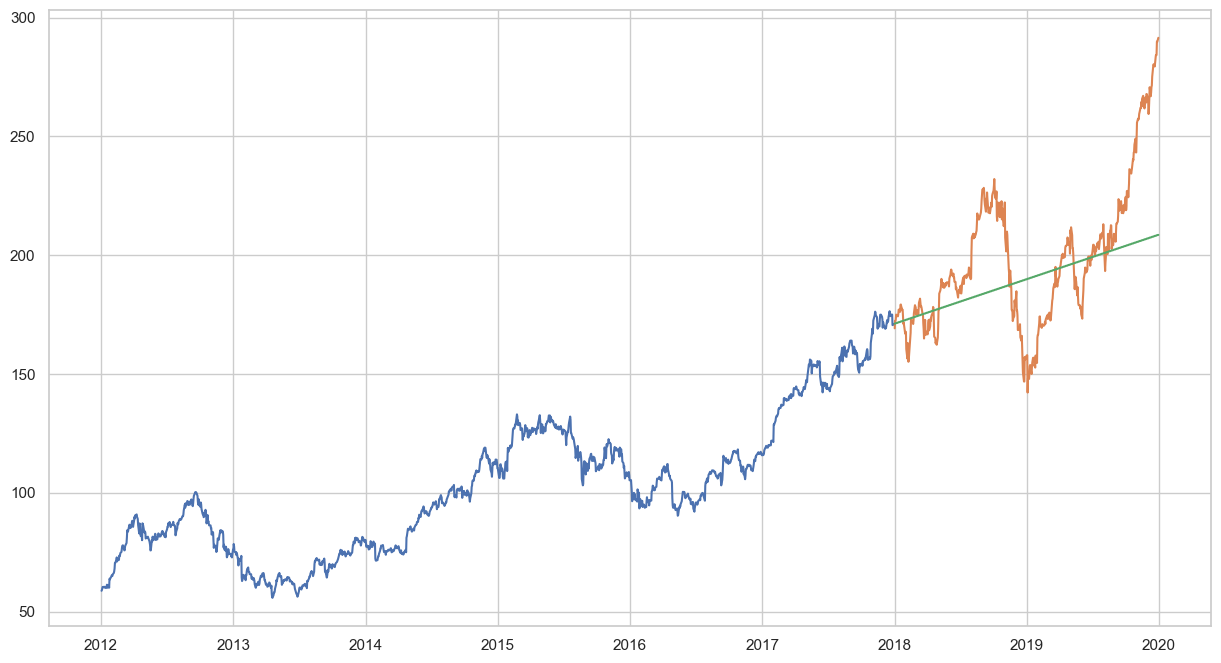

In [38]:
plt.figure(figsize=(15,8))
plt.plot(train_data )
plt.plot(test_data)
plt.plot(predicted_values[0] )
plt.show()

In [39]:
mse = mean_squared_error(test_data,predicted_values[0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,predicted_values[0])
mape = mean_absolute_percentage_error(test_data,predicted_values[0])
model_residuals['DES_AddTrend'] = [mse,rmse,mae,mape]
model_residuals

SES  DES_AddTrend
MSE   1634.603017    681.800508
RMSE    40.430224     26.111310
MAE     30.072989     19.089060
MAPE     0.137438      0.091700

# Triple Exponential Smoothing

### Additive Seasonality 

In [40]:
TES_Additive = ExponentialSmoothing(train_data, trend='mul', seasonal='add',seasonal_periods=12).fit()
res = TES_Additive.forecast(test_len)

In [41]:
predicted_values = test_data.index
predicted_values = pd.DataFrame(res.values)
predicted_values[0].index= test_data.index
predicted_values[0]

Date
2018-01-01    171.471133
2018-01-02    171.594473
2018-01-03    171.628059
2018-01-04    171.985807
2018-01-05    172.105033
                 ...    
2019-12-24    237.075898
2019-12-25    237.240413
2019-12-26    237.315200
2019-12-27    237.714174
2019-12-30    237.874653
Freq: B, Name: 0, Length: 521, dtype: float64

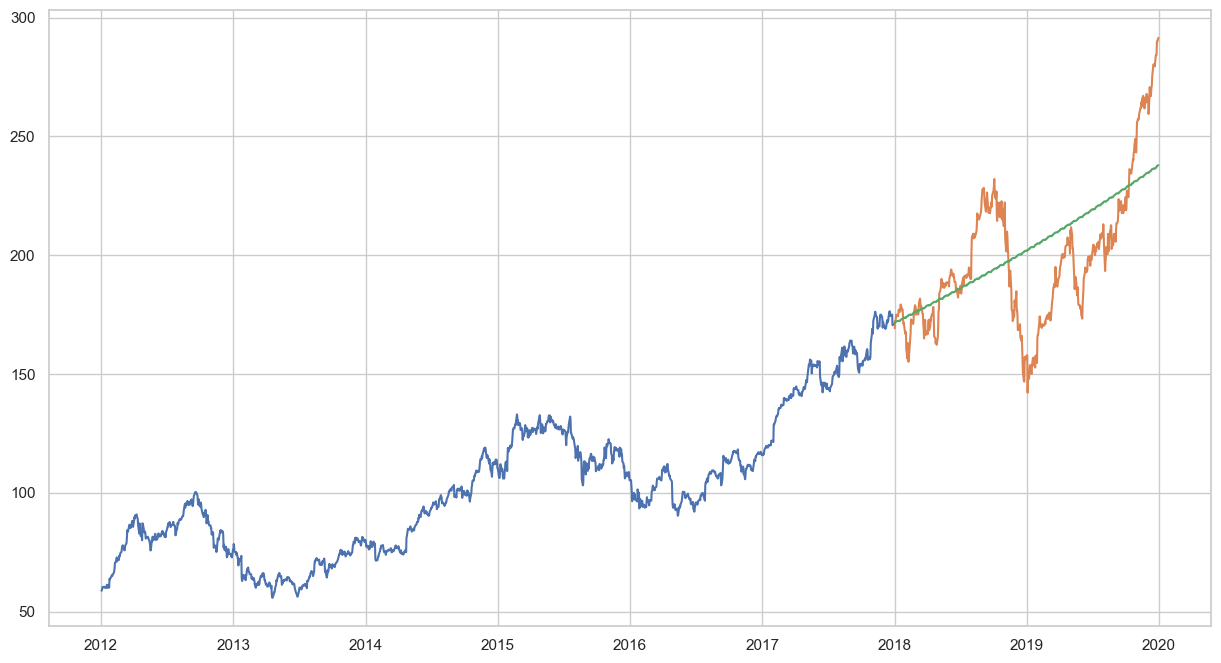

In [42]:
plt.figure(figsize=(15,8))
plt.plot(train_data )
plt.plot(test_data)
plt.plot(predicted_values[0] )
plt.show()

In [43]:
mse = mean_squared_error(test_data,predicted_values[0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,predicted_values[0])
mape = mean_absolute_percentage_error(test_data,predicted_values[0])
model_residuals['TES_Additive'] = [mse,rmse,mae,mape]
model_residuals

SES  DES_AddTrend  TES_Additive
MSE   1634.603017    681.800508    556.283976
RMSE    40.430224     26.111310     23.585673
MAE     30.072989     19.089060     18.986460
MAPE     0.137438      0.091700      0.097992

### Multiplicative Seasonality

In [44]:
TES_Multiplicative = ExponentialSmoothing(train_data, trend='add', seasonal='mul',seasonal_periods=12).fit()
res = TES_Multiplicative.forecast(test_len)

In [45]:
predicted_values = test_data.index
predicted_values = pd.DataFrame(res.values)
predicted_values[0].index= test_data.index
predicted_values[0]

Date
2018-01-01    171.503765
2018-01-02    171.577642
2018-01-03    171.440897
2018-01-04    171.982233
2018-01-05    172.016334
                 ...    
2019-12-24    208.666234
2019-12-25    208.740513
2019-12-26    208.558569
2019-12-27    209.201490
2019-12-30    209.227365
Freq: B, Name: 0, Length: 521, dtype: float64

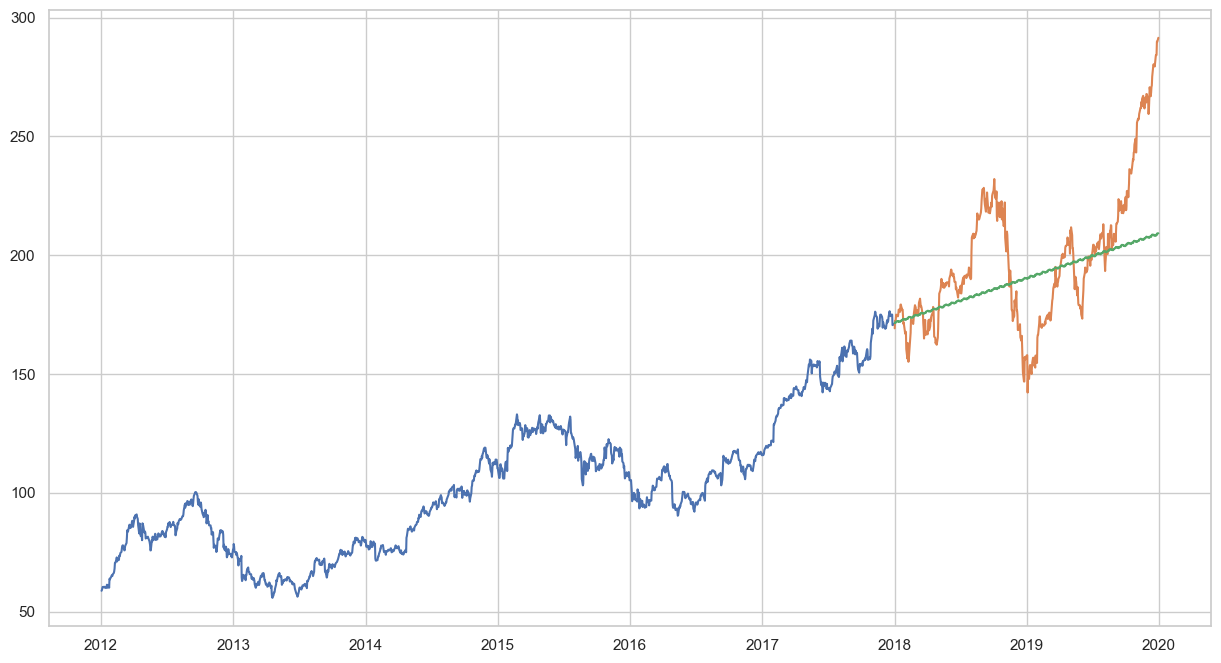

In [46]:
plt.figure(figsize=(15,8))
plt.plot(train_data )
plt.plot(test_data)
plt.plot(predicted_values[0] )
plt.show()

In [47]:
mse = mean_squared_error(test_data,predicted_values[0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,predicted_values[0])
mape = mean_absolute_percentage_error(test_data,predicted_values[0])
model_residuals['TES_Multiplicative'] = [mse,rmse,mae,mape]
model_residuals

SES  DES_AddTrend  TES_Additive  TES_Multiplicative
MSE   1634.603017    681.800508    556.283976          674.653742
RMSE    40.430224     26.111310     23.585673           25.974098
MAE     30.072989     19.089060     18.986460           18.954294
MAPE     0.137438      0.091700      0.097992            0.091208

### As per the above metrix best result given by TES_Additive Model (Tripple Exponential Smotthing)

### HyperParameter Applied to the TES_Additive Model 

**Explanation of Hyperparameters**

smoothing_level 𝛼 : Controls the level of smoothing for the overall data. Lower values give more weight to older data.

smoothing_slope β : Controls the smoothing for the trend component. Lower values give more weight to older trends.

smoothing_seasonal γ : Controls the smoothing for the seasonal component. Lower values give more weight to older seasonality patterns.


seasonal_periods: The number of periods in one seasonal cycle. This must match your data's seasonality (e.g., 12 for monthly data with yearly seasonality).

trend: Specifies the type of trend component to use ('add' or 'mul').

seasonal: Specifies the type of seasonal component to use ('add' or 'mul').

damped_trend: If True, applies a damping factor to the trend component to prevent it from growing too fast.

In [48]:
# Fit the Holt-Winters Additive model on the training data
TES_Additive = ExponentialSmoothing(
    train_data,
    trend='mul',  # Multiplicative trend component
    seasonal='add',  # Additive seasonal component
    seasonal_periods=365  # Adjust based on your data's seasonality
)

# Fitting the model with specified smoothing parameters
fitted_model = TES_Additive.fit(
    smoothing_level= 0.15000000000000002,  # Alpha
    smoothing_slope=0.0223,  # Beta
    smoothing_seasonal=0.4955555555555555,  # Gamma
    optimized=False  # Do not optimize if you are manually setting the parameters
)
res = fitted_model.forecast(test_len)

In [49]:
predicted_values = test_data.index
predicted_values = pd.DataFrame(res.values)
predicted_values[0].index= test_data.index
predicted_values[0]

Date
2018-01-01    175.022788
2018-01-02    176.187693
2018-01-03    177.176301
2018-01-04    177.499420
2018-01-05    177.643506
                 ...    
2019-12-24    270.784678
2019-12-25    270.941849
2019-12-26    270.232556
2019-12-27    270.618869
2019-12-30    270.838875
Freq: B, Name: 0, Length: 521, dtype: float64

In [50]:
mse = mean_squared_error(test_data,predicted_values[0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,predicted_values[0])
mape = mean_absolute_percentage_error(test_data,predicted_values[0])
model_residuals['TES_hyp'] = [mse,rmse,mae,mape]
model_residuals

SES  DES_AddTrend  TES_Additive  TES_Multiplicative      TES_hyp
MSE   1634.603017    681.800508    556.283976          674.653742  1110.869589
RMSE    40.430224     26.111310     23.585673           25.974098    33.329710
MAE     30.072989     19.089060     18.986460           18.954294    27.102111
MAPE     0.137438      0.091700      0.097992            0.091208     0.144473

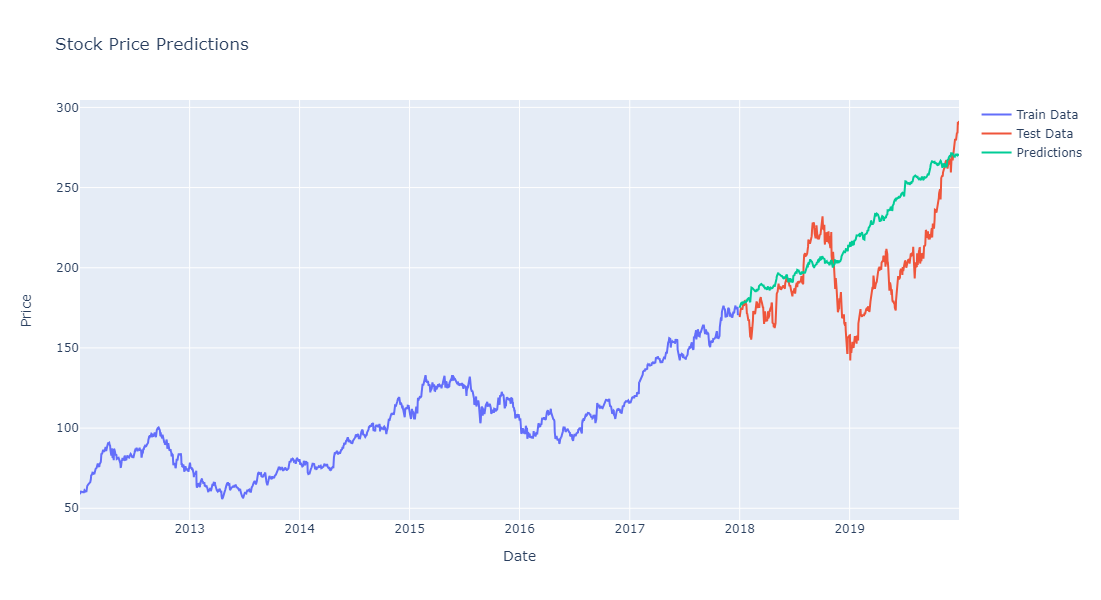

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1)

# Add the training data to the plot
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Train Data'))

# Add the testing data to the plot
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Test Data'))

# Add the predictions to the plot
fig.add_trace(go.Scatter(x=predicted_values[0].index, y=predicted_values[0], mode='lines', name='Predictions'))

# Update layout
fig.update_layout(
    title='Stock Price Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1000,
    height=600
)

# Show the plot
fig.show()

### Tripple Exponential Smoothing

### I want prediction for 30 days(Short Term Prediction) and I have dataset length  of 2011,

### First need to seperate proper training and testing length so 1970 and 41.

In [52]:
df = pd.read_csv('AAPL.csv')
df.tail()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # specify the correct format
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1 2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2 2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3 2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4 2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [53]:
df.set_index('Date', inplace=True)

In [54]:
df.freq='B'

In [55]:
train_len =int(len(df)*0.985)
test_len = int(len(df)*0.0158)
train_len, test_len

(1980, 31)

In [56]:
n_df = df["Close"]

In [57]:
train_data = n_df[:1980]
test_data = n_df[1980:]

# Best TES Model with best hyperparameter tuning  

**smoothing_level=0.1,**  # Alpha

**smoothing_slope=0.033400000000000006,**  # Beta

**smoothing_seasonal=0.8911111111111111,**  # Gamma


In [58]:
# Fit the Holt-Winters Additive model on the training data
TES_Additive = ExponentialSmoothing(
    train_data,
    trend='mul',  # Multiplicative trend component
    seasonal='add',  # Additive seasonal component
    seasonal_periods=365  # Adjust based on your data's seasonality
)

# Fitting the model with specified smoothing parameters
fitted_model = TES_Additive.fit(
    smoothing_level=0.1,  # Alpha
    smoothing_slope=0.033400000000000006,  # Beta
    smoothing_seasonal=0.8911111111111111,  # Gamma
    optimized=False  # Do not optimize if you are manually setting the parameters
)
res = fitted_model.forecast(test_len)
len(res)
len(res)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



31

In [59]:
predicted_values = test_data.index
len(test_data)
len(predicted_values)
predicted_values = pd.DataFrame(res.values)
print(predicted_values)
predicted_values[0].index= test_data.index

             0
0   263.210002
1   264.178402
2   263.977470
3   262.807989
4   263.076014
5   264.738806
6   263.994053
7   264.784604
8   263.777184
9   264.595095
10  262.835893
11  264.914788
12  265.323032
13  266.228478
14  265.221584
15  268.793402
16  269.773647
17  272.251150
18  272.988720
19  275.896702
20  273.906505
21  276.399995
22  279.694228
23  282.965593
24  283.448063
25  281.983448
26  285.740296
27  286.636649
28  287.586234
29  289.166605
30  289.183979


In [60]:
mse = mean_squared_error(test_data,predicted_values[0])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,predicted_values[0])
mape = mean_absolute_percentage_error(test_data,predicted_values[0])
model_residuals['TES_Add_with_hyp_new'] = [mse,rmse,mae,mape]
model_residuals

SES  DES_AddTrend  TES_Additive  TES_Multiplicative  \
MSE   1634.603017    681.800508    556.283976          674.653742   
RMSE    40.430224     26.111310     23.585673           25.974098   
MAE     30.072989     19.089060     18.986460           18.954294   
MAPE     0.137438      0.091700      0.097992            0.091208   

          TES_hyp  TES_Add_with_hyp_new  
MSE   1110.869589              7.689614  
RMSE    33.329710              2.773015  
MAE     27.102111              2.395426  
MAPE     0.144473              0.008840

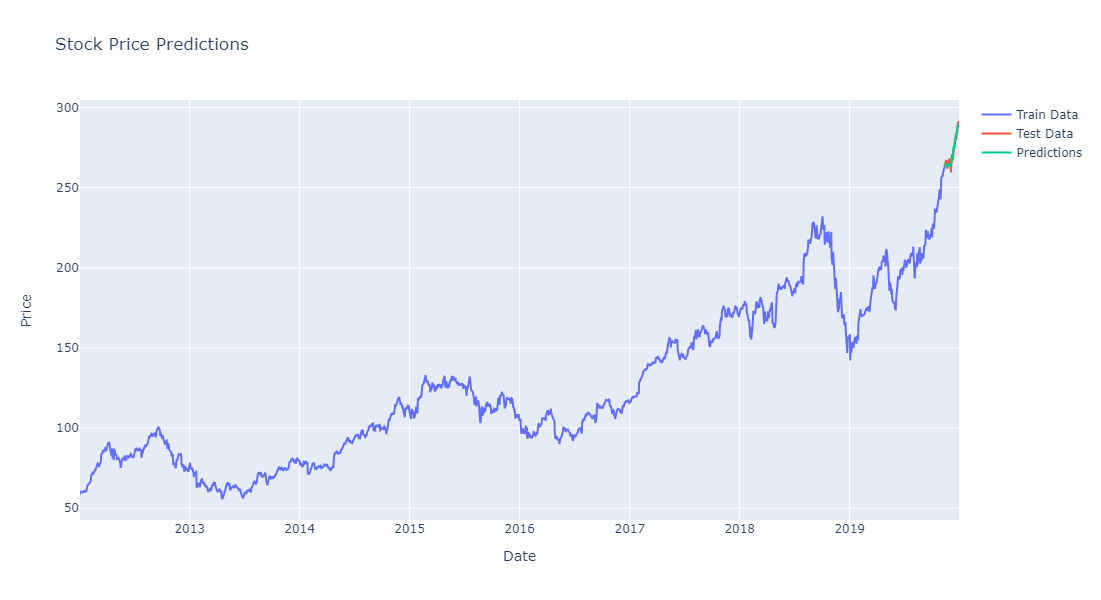

In [61]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1)

# Add the training data to the plot
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Train Data'))

# Add the testing data to the plot
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Test Data'))

# Add the predictions to the plot
fig.add_trace(go.Scatter(x=predicted_values[0].index, y=predicted_values[0], mode='lines', name='Predictions'))

# Update layout
fig.update_layout(
    title='Stock Price Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1000,
    height=600
)

# Show the plot
fig.show()

# Final Model for next 30 days prediction

In [62]:
# Fit the Holt-Winters Additive model on the training data
TES_Additive = ExponentialSmoothing(
    new_df,
    trend='mul',  # Multiplicative trend component
    seasonal='add',  # Additive seasonal component
    seasonal_periods=365  # Adjust based on your data's seasonality
)

# Fitting the model with specified smoothing parameters
fitted_model = TES_Additive.fit(
    smoothing_level=0.1,  # Alpha
    smoothing_slope=0.033400000000000006,  # Beta
    smoothing_seasonal=0.8911111111111111,  # Gamma
    optimized=False  # Do not optimize if you are manually setting the parameters
)
res = fitted_model.forecast(30)

In [63]:
predictions = np.array(res)
predictions

array([294.21785342, 294.21599652, 295.64363734, 294.32545321,
       295.76647243, 296.55514875, 297.22029578, 300.19077966,
       303.99649242, 301.87430052, 301.8881946 , 302.38729271,
       303.2793507 , 304.34318017, 306.36858664, 308.30333404,
       311.33614756, 312.95611933, 314.85610448, 314.24409607,
       314.20264354, 312.27728504, 308.51384608, 306.98572608,
       304.72924443, 310.30366181, 307.96090648, 313.36207847,
       311.21183196, 306.48079613])

In [64]:
import pandas as pd
import numpy as np

# Prediction values (example given by you)
predictions = ([290.84119665, 291.39973529, 292.55116001, 294.76935845,
       297.16710897, 297.27366035, 295.25354886, 295.42547137,
       296.88187079, 307.94857413, 313.26245385, 313.37711067,
       313.8766894 , 311.67654071, 311.65023927, 313.01241675,
       311.87541997, 313.1556602 , 314.02195208, 314.41264164,
       317.12149755, 320.58537975, 318.00656872, 317.25510817,
       316.9471422 , 317.04831742, 317.50528356, 318.93997746,
       320.17918248, 322.84962477])
# Last date of the dataset
last_date = pd.to_datetime("2019-12-30")

# Generate the date range for the next 30 business days
prediction_dates = pd.date_range(start=last_date, periods=len(predictions) + 1, freq='B', closed='right')

# Create DataFrame
df_predictions = pd.DataFrame(predictions, index=prediction_dates, columns=['Close'])

# Display the DataFrame

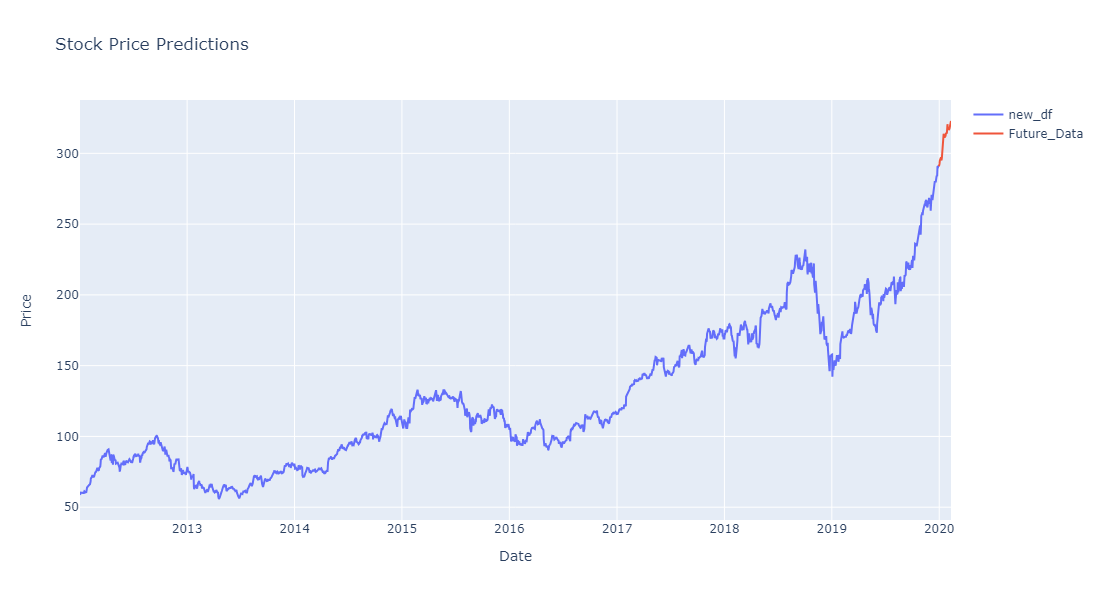

In [65]:
plt.figure(figsize=(15,8))
plt.plot(new_df )
plt.plot(df_predictions["Close"] )
plt.show()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1)

# Add the training data to the plot
fig.add_trace(go.Scatter(x=new_df.index, y=new_df, mode='lines', name='new_df'))

# Add the testing data to the plot
fig.add_trace(go.Scatter(x=df_predictions.index, y=df_predictions["Close"], mode='lines', name='Future_Data'))
# Update layout
fig.update_layout(
    title='Stock Price Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1100,
    height=600
)

# Show the plot
fig.show()

#### Model Prediction

In [66]:
df_predictions

Close
2019-12-31  290.841197
2020-01-01  291.399735
2020-01-02  292.551160
2020-01-03  294.769358
2020-01-06  297.167109
2020-01-07  297.273660
2020-01-08  295.253549
2020-01-09  295.425471
2020-01-10  296.881871
2020-01-13  307.948574
2020-01-14  313.262454
2020-01-15  313.377111
2020-01-16  313.876689
2020-01-17  311.676541
2020-01-20  311.650239
2020-01-21  313.012417
2020-01-22  311.875420
2020-01-23  313.155660
2020-01-24  314.021952
2020-01-27  314.412642
2020-01-28  317.121498
2020-01-29  320.585380
2020-01-30  318.006569
2020-01-31  317.255108
2020-02-03  316.947142
2020-02-04  317.048317
2020-02-05  317.505284
2020-02-06  318.939977
2020-02-07  320.179182
2020-02-10  322.849625

# Prophet

### Data Preprocessing 

In [67]:
###pip install prophet

In [68]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [69]:
df = pd.read_csv('AAPL.csv')
df.tail()

Date        Open        High         Low       Close   Adj Close  \
2006  23-12-2019  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  24-12-2019  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  26-12-2019  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  27-12-2019  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  30-12-2019  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600

In [70]:
data = df[["Date","Close"]]
data

Date       Close
0     03-01-2012   58.747143
1     04-01-2012   59.062859
2     05-01-2012   59.718571
3     06-01-2012   60.342857
4     09-01-2012   60.247143
...          ...         ...
2006  23-12-2019  284.000000
2007  24-12-2019  284.269989
2008  26-12-2019  289.910004
2009  27-12-2019  289.799988
2010  30-12-2019  291.519989

[2011 rows x 2 columns]

In [71]:
data["Date"].freq='B'

In [72]:
train_len =int(len(data)*0.985)
test_len = int(len(data)*0.0158)
train_len, test_len

(1980, 31)

In [73]:
train_data = data[:1980]
test_data = data[1980:]
test_data

Date       Close
1980  14-11-2019  262.640015
1981  15-11-2019  265.760010
1982  18-11-2019  267.100006
1983  19-11-2019  266.290009
1984  20-11-2019  263.190002
1985  21-11-2019  262.010010
1986  22-11-2019  261.779999
1987  25-11-2019  266.369995
1988  26-11-2019  264.290009
1989  27-11-2019  267.839996
1990  29-11-2019  267.250000
1991  02-12-2019  264.160004
1992  03-12-2019  259.450012
1993  04-12-2019  261.739990
1994  05-12-2019  265.579987
1995  06-12-2019  270.709991
1996  09-12-2019  266.920013
1997  10-12-2019  268.480011
1998  11-12-2019  270.769989
1999  12-12-2019  271.459991
2000  13-12-2019  275.149994
2001  16-12-2019  279.859985
2002  17-12-2019  280.410004
2003  18-12-2019  279.739990
2004  19-12-2019  280.019989
2005  20-12-2019  279.440002
2006  23-12-2019  284.000000
2007  24-12-2019  284.269989
2008  26-12-2019  289.910004
2009  27-12-2019  289.799988
2010  30-12-2019  291.519989

### Model Building 

In [74]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [75]:
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
model = Prophet(seasonality_mode='additive', yearly_seasonality='auto',changepoint_prior_scale = 1.0, changepoint_range= 0.95, 
        holidays_prior_scale= 0.1, seasonality_prior_scale= 10.0,changepoints=None)
model.fit(data)

12:51:10 - cmdstanpy - INFO - Chain [1] start processing
12:51:11 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
model

             ds        yhat
0    2012-01-02   79.364275
1    2012-01-03   80.625264
2    2012-01-05   79.804621
3    2012-01-06   78.955075
4    2012-01-08   78.259633
...         ...         ...
2037 2020-02-05  276.818717
2038 2020-02-06  277.868061
2039 2020-02-07  278.399223
2040 2020-02-10  280.764423
2041 2020-02-11  282.709565

[2042 rows x 2 columns]


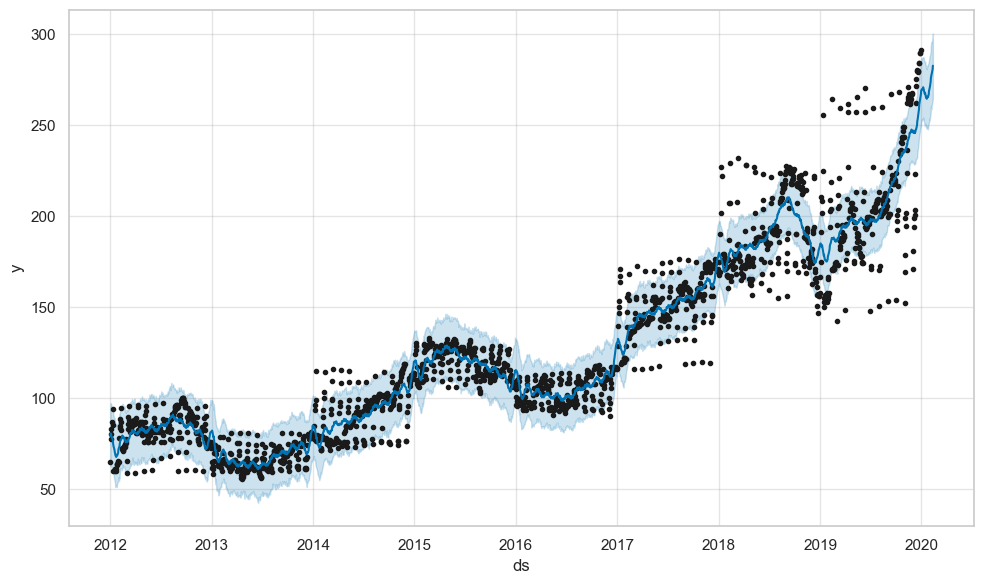

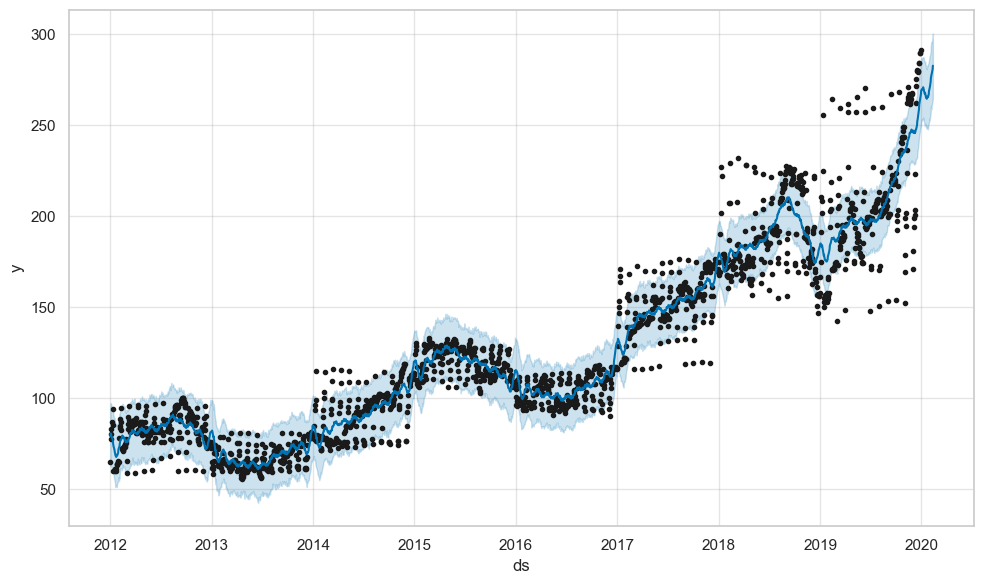

In [77]:
future = model.make_future_dataframe(periods=31, freq='B')
forecast = model.predict(future)

forecasted_values = forecast[['ds', 'yhat',]]
# Display the forecasted values
print(forecasted_values)

model.plot(forecast)

##### Initialize the plot

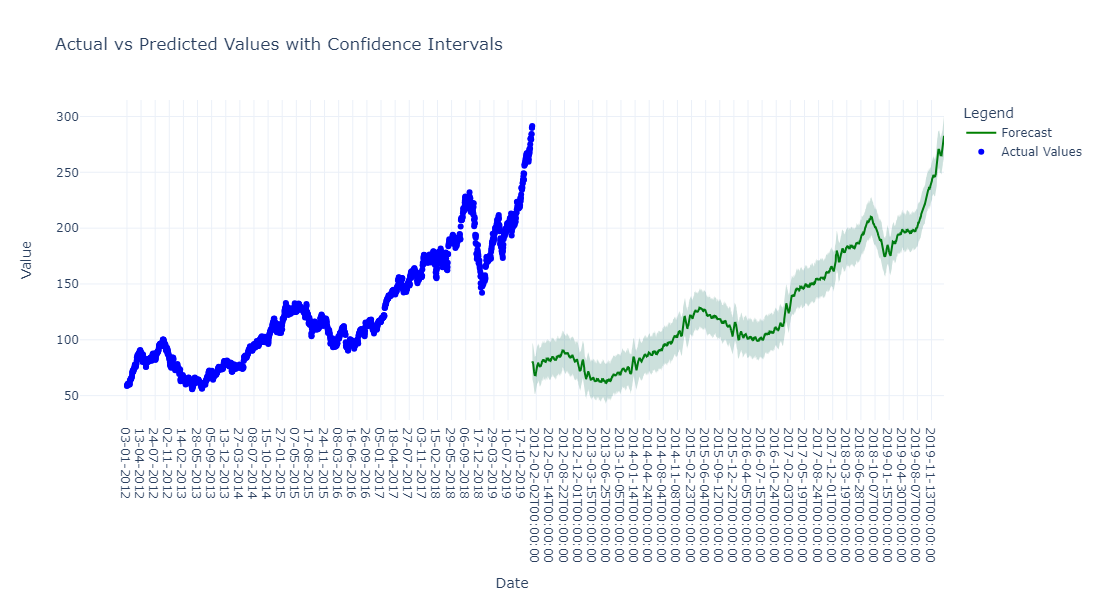

In [78]:
# Initialize the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['ds'], 
    y=data['y'], 
    mode='markers', 
    name='Actual Values', 
    marker=dict(color='blue')
))

# Predicted values
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast', 
    line=dict(color='green')
))

# Confidence intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat_upper'], 
    mode='lines',
    name='Upper Confidence Interval',
    line=dict(width=0),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat_lower'], 
    mode='lines',
    name='Lower Confidence Interval',
    line=dict(width=0),
    fill='tonexty', 
    fillcolor='rgba(0, 100, 80, 0.2)',
    showlegend=False
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Values with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend',
    template='plotly_white',
    width=1100,
    height=600
)

# Show the plot
fig.show()

#### Perfomance Metrix

In [79]:
test_data['Close'].values

array([262.640015, 265.76001 , 267.100006, 266.290009, 263.190002,
       262.01001 , 261.779999, 266.369995, 264.290009, 267.839996,
       267.25    , 264.160004, 259.450012, 261.73999 , 265.579987,
       270.709991, 266.920013, 268.480011, 270.769989, 271.459991,
       275.149994, 279.859985, 280.410004, 279.73999 , 280.019989,
       279.440002, 284.      , 284.269989, 289.910004, 289.799988,
       291.519989])

In [80]:
actual_values = test_data['Close'].values
forecast_values = forecast['yhat'].tail(31).values

# Calculate evaluation metrics
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, forecast_values)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Now, let's predict for the next 31 days
future_forecast = model.make_future_dataframe(periods=31)
forecast = model.predict(future_forecast)


Mean Squared Error (MSE): 39.49020319043324
Root Mean Squared Error (RMSE): 6.284123104334705
Mean Absolute Error (MAE): 5.53853009679212
Mean Absolute Percentage Error (MAPE): 2.0202672048739405


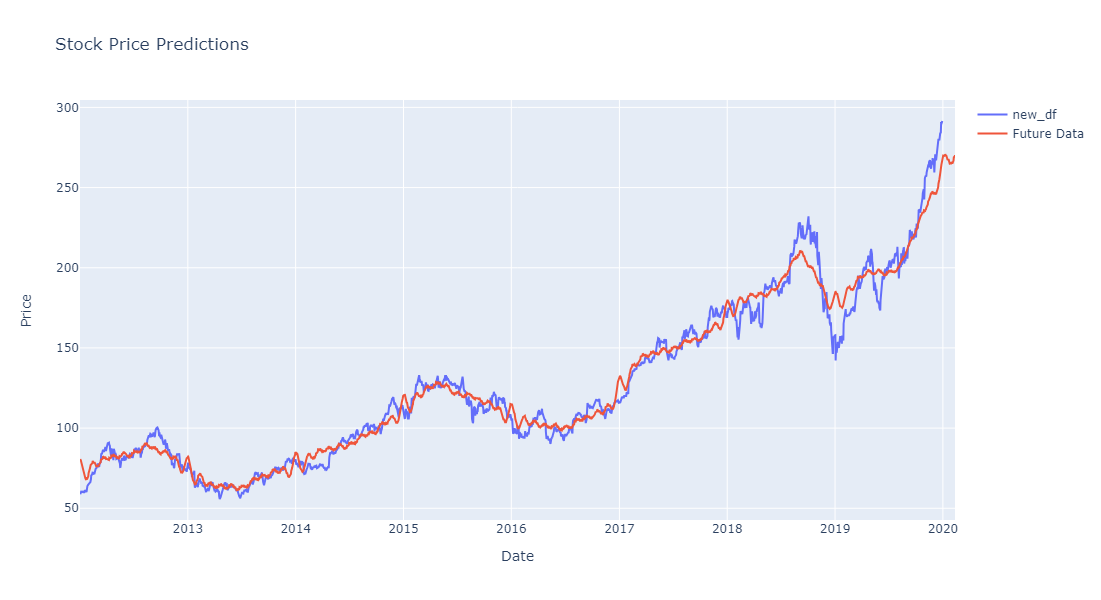

In [81]:
# Initialize the plot
fig = go.Figure()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1)

# Add the training data to the plot
fig.add_trace(go.Scatter(x=new_df.index, y=new_df, mode='lines', name='new_df'))

# Add the testing data to the plot
fig.add_trace(go.Scatter(x=future["ds"], y=forecast["yhat"], mode='lines', name='Future Data'))
# Update layout
fig.update_layout(
    title='Stock Price Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1100,
    height=600
)

# Show the plot
fig.show()

### Cross-validation and performance metrics

In [82]:
# Cross-validation and performance metrics
df_cv = cross_validation(model, initial='2011 days', period='365 days', horizon='31 days')
df_cv

  0%|          | 0/3 [00:00<?, ?it/s]

12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:17 - cmdstanpy - INFO - Chain [1] done processing
12:51:17 - cmdstanpy - INFO - Chain [1] start processing
12:51:18 - cmdstanpy - INFO - Chain [1] done processing
12:51:18 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing


ds        yhat  yhat_lower  yhat_upper           y     cutoff
0  2017-11-30  164.958321  154.598371  174.882208  171.850006 2017-11-29
1  2017-12-01  165.101129  155.392822  176.619107  119.250000 2017-11-29
2  2017-12-04  163.738734  153.275237  174.183762  141.800003 2017-11-29
3  2017-12-05  163.830770  153.236364  174.461136  156.100006 2017-11-29
4  2017-12-06  163.480792  153.116619  173.297549  145.419998 2017-11-29
..        ...         ...         ...         ...         ...        ...
58 2019-12-23  245.002851  228.045887  260.055998  284.000000 2019-11-29
59 2019-12-24  247.328724  231.064739  262.668046  284.269989 2019-11-29
60 2019-12-26  248.951376  232.639689  265.489985  289.910004 2019-11-29
61 2019-12-27  249.747888  233.538659  264.864556  289.799988 2019-11-29
62 2019-12-30  252.974581  236.663111  268.742957  291.519989 2019-11-29

[63 rows x 6 columns]

In [83]:
df_p = performance_metrics(df_cv)
df_p

horizon          mse       rmse        mae      mape     mdape     smape  \
0   3 days  1527.166304  39.078975  32.748030  0.211180  0.160293  0.183767   
1   4 days  2146.226829  46.327387  41.334815  0.258030  0.276860  0.222363   
2   5 days  1682.742524  41.021245  36.162410  0.206262  0.186681  0.182919   
3   6 days  1168.952231  34.189943  28.650015  0.162183  0.140477  0.146338   
4   7 days   745.000822  27.294703  22.276196  0.127057  0.125217  0.116881   
5   8 days   702.123960  26.497622  21.051525  0.117055  0.119848  0.107854   
6   9 days   833.757249  28.874855  24.012123  0.129474  0.119848  0.119050   
7  10 days   615.824695  24.815815  20.286491  0.101184  0.116058  0.096436   
8  11 days   559.761382  23.659277  19.579474  0.093916  0.094970  0.092769   
9  12 days   320.593770  17.905133  14.389554  0.064802  0.067040  0.067094   
10 13 days   452.698012  21.276701  18.082208  0.083988  0.069792  0.084833   
11 14 days   633.453521  25.168503  22.964829  0.109447  0.125424  0.109403   
12 15 days   597.049127  24.434589  22.093862  0.112838  0.095558  0.110855   
13 16 days   517.204691  22.742135  20.197262  0.105353  0.098276  0.103848   
14 17 days   680.014838  26.077094  23.055472  0.111210  0.098276  0.111479   
15 18 days   889.310373  29.821307  27.187413  0.130726  0.142541  0.129645   
16 19 days  1134.849577  33.687529  32.310247  0.145852  0.142541  0.146144   
17 20 days   916.085237  30.266900  27.768138  0.135736  0.137601  0.133376   
18 21 days  1004.342894  31.691369  28.581685  0.143876  0.135492  0.138854   
19 22 days  1072.721402  32.752426  28.661058  0.158713  0.094763  0.148056   
20 23 days   922.493939  30.372585  25.323920  0.143191  0.093771  0.133359   
21 24 days  1002.630199  31.664336  27.001250  0.141457  0.135558  0.134347   
22 25 days  1355.437034  36.816260  32.383323  0.174281  0.133633  0.161483   
23 27 days  1565.350156  39.564506  35.879719  0.176351  0.139297  0.166168   
24 28 days  1228.008667  35.042955  28.684751  0.143441  0.139743  0.134815   
25 29 days  1180.430923  34.357400  26.895201  0.145623  0.070507  0.133303   
26 30 days   977.553538  31.265853  22.569782  0.124536  0.077243  0.113564   
27 31 days  1019.984402  31.937195  24.217010  0.122559  0.074251  0.114653   

    coverage  
0   0.166667  
1   0.000000  
2   0.000000  
3   0.166667  
4   0.333333  
5   0.333333  
6   0.277778  
7   0.277778  
8   0.333333  
9   0.444444  
10  0.416667  
11  0.333333  
12  0.388889  
13  0.333333  
14  0.277778  
15  0.166667  
16  0.000000  
17  0.166667  
18  0.333333  
19  0.388889  
20  0.500000  
21  0.444444  
22  0.333333  
23  0.166667  
24  0.333333  
25  0.388889  
26  0.500000  
27  0.444444

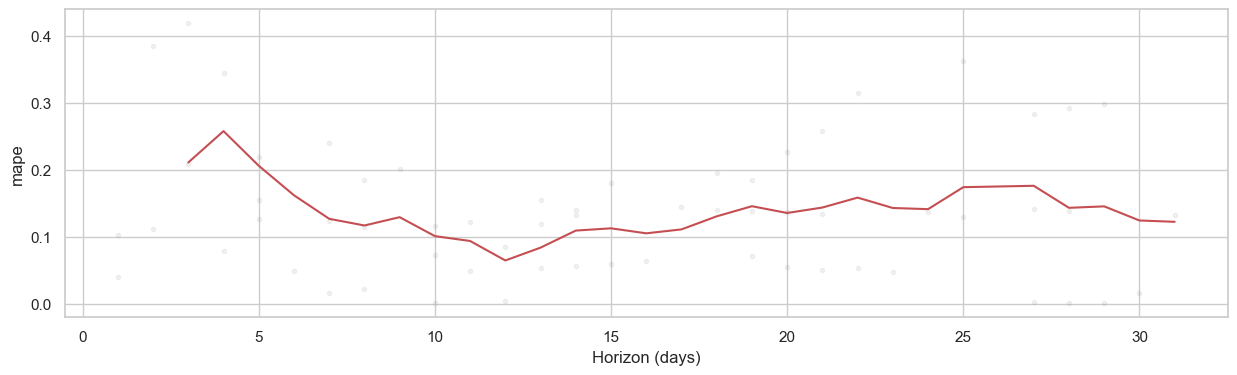

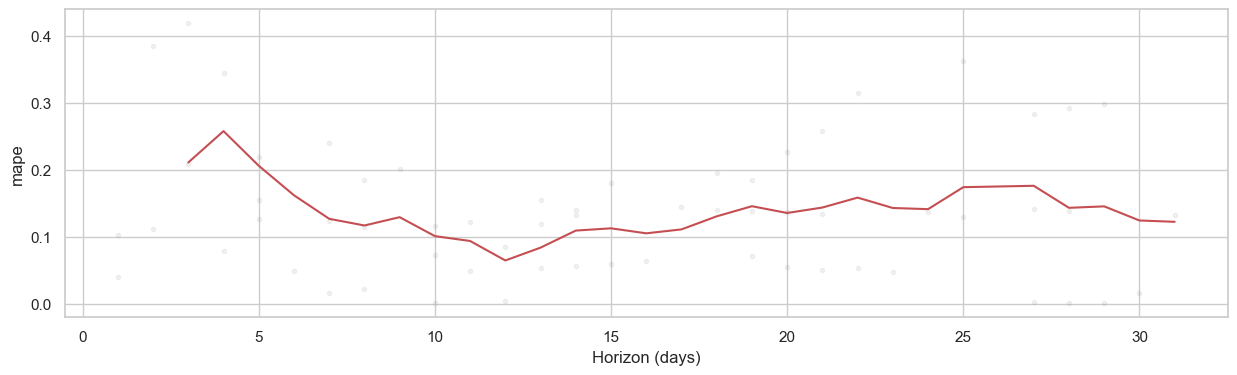

In [84]:
plot_cross_validation_metric(df_cv, metric='mape',figsize=(15, 4),
    color='r',
    point_color='gray')

In [85]:
actual_df
actual_df['Date'] = pd.to_datetime(actual_df['Date'], format='%d-%m-%Y')  # specify the correct format
df.head()

ds       Open       High        Low          y  Adj Close    Volume
0  03-01-2012  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  04-01-2012  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  05-01-2012  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  06-01-2012  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  09-01-2012  60.785713  61.107143  60.192856  60.247143  52.061932  98506100